<b>In this practical exam you are required to do the following:</b><b>
1. Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.
2. Update your implementation to work for mini-batch.
</b>

### Please fulfil the following requirements:
<br>
<b>
    
    1. Each implementation must be in a sepearate function. i.e. two separate functions.
    2. Check each function on the data in the attached file.
    3. You must obtain r2-score > 0.9 using each functiion.
    4. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    5. Choose hyper parameters to obtain the required accuracy.
    6. The implementation must be vectoried and calculations must be performed as matrix vector multiplications.
    7. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>
    
<b><i>Note: You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b>

# Import Libraies

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import r2_score

In [14]:
Data_points = np.genfromtxt("MultipleLR.csv - MultipleLR.csv.csv" ,  delimiter= ',')
X_Data = Data_points[:,0:3]
Y_Data = Data_points[:,1]

In [15]:
feature_length = X_Data.shape[1]

In [16]:
feture = np.concatenate((np.ones(len(X_Data)).reshape( len(X_Data), 1) 
                         , X_Data.reshape(len(X_Data) , feature_length))  , axis = 1)



In [17]:
feture.shape

(25, 4)

# Generate Batches

In [18]:
def Generate_Batches(Data  , batch_size):
    Batches = []
    M = 0
    while(M+batch_size <= len(Data)):
        Batches.append(Data[M : M+batch_size])
        M +=batch_size-1
    Batches.append(Data[M : ]) 
    return Batches



# Adam Algorithm use MiniBatch Multivariable

In [19]:
def Adam_MiniBatch(feture , Y_Data  , alpha , Max_no_iter , Batch_Size , stoping_therthold , epslon , Beta_1 , Beta_2):
    #Intialization
    feature_length = feture.shape[1]
    theta = np.zeros(feature_length).reshape(1,feature_length)
    alpha = alpha
    Not_first_iter = 0
    
    Jtheta = []
    theta_zero = []
    theta_one = []
    theta_two = []
    theta_three = []
     
    Max_no_iter = Max_no_iter
    Mt = np.zeros(feature_length).reshape(1,feature_length)
    Vt = np.zeros(feature_length).reshape(1,feature_length)
    Mt_hat = np.zeros(feature_length).reshape(1,feature_length)
    Vt_hat = np.zeros(feature_length).reshape(1,feature_length)
    epslon = epslon
    Beta_1 = Beta_1
    Beta_2 = Beta_2

    Batch_Size = Batch_Size
    feture_Mini = Generate_Batches(feture , Batch_Size)
    Y_mini = Generate_Batches(Y_Data , Batch_Size)
    
    
    for j in range(Max_no_iter):
        for i in range(len(feture_Mini)):
            #Calculate Y predict and measure the error
            Data_length = feture_Mini[i].shape[0]
            Y= np.dot(theta ,feture_Mini[i].T)
            Error = Y - Y_mini[i]
            #Stopping Condition
            if (Not_first_iter >len(feture_Mini) and np.abs(Jtheta[-1]-Jtheta[-1*(len(feture_Mini)+1)]) < stoping_therthold
               and np.linalg.norm(Gradt) < 0.001):
                break
            Not_first_iter +=1
            #Append Thetas in lists
            theta_zero.append(theta[0][0])
            theta_one.append(theta[0][1])
            theta_two.append(theta[0][2])
            theta_three.append(theta[0][3])
            #Calculate Cost and append it in list
            Jtheta.append((1/(2*Data_length))*(np.dot( Error , Error.T)[0][0]))
            #Calculate Gradient
            Gradt = (np.dot( Error , feture_Mini[i]) /Data_length)

            #Calculate Cost and append it in list
            Mt = Beta_1*Mt + (1-Beta_1)*Gradt
            Vt = Beta_2*Vt + (1-Beta_2)*np.square(Gradt)
            Mt_hat = Mt/(1-(Beta_1**(j+1)))
            Vt_hat = Vt/(1-(Beta_2**(j+1)))
            theta = theta - (alpha/np.sqrt(Vt_hat+epslon))*Mt_hat
            

    #print number of iterations stopped at it 
    print("Number of Epochs {}".format(len(Jtheta)//len(feture_Mini)))

    return theta[0] , theta_zero , theta_one , theta_two , theta_three , Jtheta 

In [20]:
theta , theta_zero , theta_one , theta_three, theta_four , Jtheta = Adam_MiniBatch(feture , Y_Data  , 0.001 ,
                                                                                  10000 , 5 , 0.01 , 0.001 , 0.9 , 0.8)

#print Accuracy 
print("Accuracy of Adam MINIBatch is {}".format(r2_score(np.dot(theta ,feture.T) , Y_Data)))

Number of Epochs 3672
Accuracy of Adam MINIBatch is 0.9999998657624279


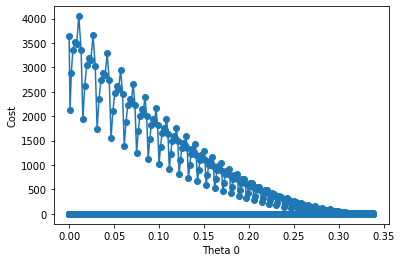

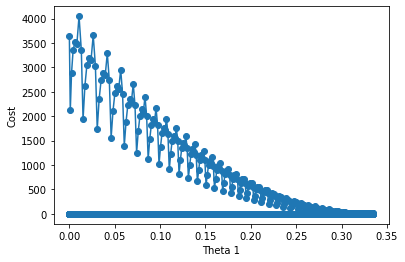

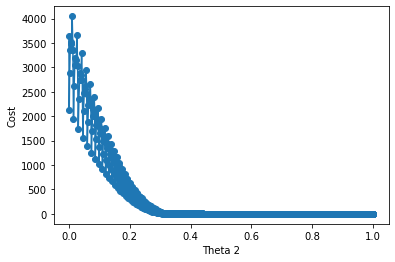

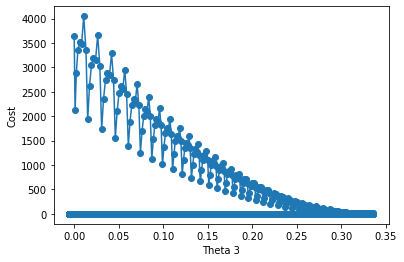

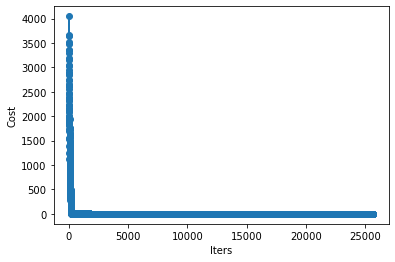

In [21]:
plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_three , Jtheta , '-o')
plt.xlabel("Theta 2")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_four , Jtheta , '-o')
plt.xlabel("Theta 3")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()



# Adam Algorithm use Batch Multivariable

In [22]:
def Adam_Batch(feture , Y_Data  , alpha , Max_no_iter , Batch_Size , stoping_therthold , epslon , Beta_1 , Beta_2):
    #Intialization
    feature_length = feture.shape[1]
    theta = np.zeros(feature_length).reshape(1,feature_length)
    alpha = alpha
    Not_first_iter = 0
    
    Jtheta = []
    theta_zero = []
    theta_one = []
    theta_two = []
    theta_three = []
     
    Max_no_iter = Max_no_iter
    Mt = np.zeros(feature_length).reshape(1,feature_length)
    Vt = np.zeros(feature_length).reshape(1,feature_length)
    Mt_hat = np.zeros(feature_length).reshape(1,feature_length)
    Vt_hat = np.zeros(feature_length).reshape(1,feature_length)
    epslon = epslon
    Beta_1 = Beta_1
    Beta_2 = Beta_2


    Data_length = len(feture)
    
    for j in range(Max_no_iter):
        #Calculate Y predict and measure the error
        Y= np.dot(theta ,feture.T)
        Error = Y - Y_Data
        #Stopping Condition
        if (Not_first_iter >1 and np.abs(Jtheta[-1]-Jtheta[-2]) < stoping_therthold and np.linalg.norm(Gradt) < 0.001):
            break
        Not_first_iter +=1
        
        #Append Thetas in lists
        theta_zero.append(theta[0][0])
        theta_one.append(theta[0][1])
        theta_two.append(theta[0][2])
        theta_three.append(theta[0][3])
        #Calculate Cost and append it in list
        Jtheta.append((1/(2*Data_length))*(np.dot( Error , Error.T)[0][0]))
        #Calculate Gradient
        Gradt = (np.dot( Error , feture) /Data_length)

        #Adam equations and update
        Mt = Beta_1*Mt + (1-Beta_1)*Gradt
        Vt = Beta_2*Vt + (1-Beta_2)*np.square(Gradt)
        Mt_hat = Mt/(1-(Beta_1**(j+1)))
        Vt_hat = Vt/(1-(Beta_2**(j+1)))
        theta = theta - (alpha/np.sqrt(Vt_hat+epslon))*Mt_hat


    #print number of iterations stopped at it 
    print("Number of Epochs {}".format(len(Jtheta)))

    return theta[0] , theta_zero , theta_one , theta_two , theta_three , Jtheta 

In [23]:
theta , theta_zero , theta_one , theta_three, theta_four , Jtheta = Adam_Batch(feture , Y_Data  , 0.001 ,
                                                                                  10000 , 5 , 0.01 , 0.001 , 0.9 , 0.8)

#print Accuracy 
print("Accuracy of Adam Batch is {}".format(r2_score(np.dot(theta ,feture.T) , Y_Data)))

Number of Epochs 6823
Accuracy of Adam Batch is 0.9999992292660652


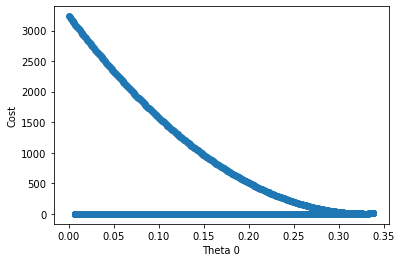

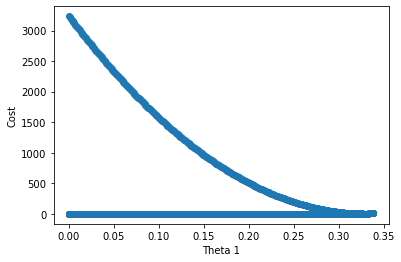

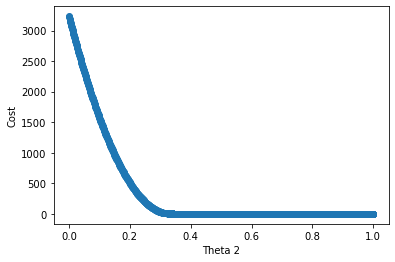

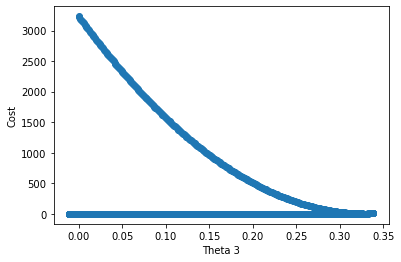

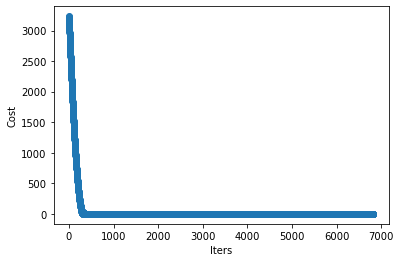

In [24]:
plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_three , Jtheta , '-o')
plt.xlabel("Theta 2")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_four , Jtheta , '-o')
plt.xlabel("Theta 3")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

